In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

# Spline Fitting With SciPy

In [2]:
# Sample data
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])
y = np.array([12, 8, 11, 7, 5, 2, 3, 5, 6, 4, 5, 7, 8, 13, 19, 22, 25])

### Basic Spline Interpolation Example

To fit a spline through a set of points $(x_i, y_i)$ exactly, use the `InterpolatedUnivariateSpline` or `make_interp_spline` functions:

<IPython.core.display.Javascript object>


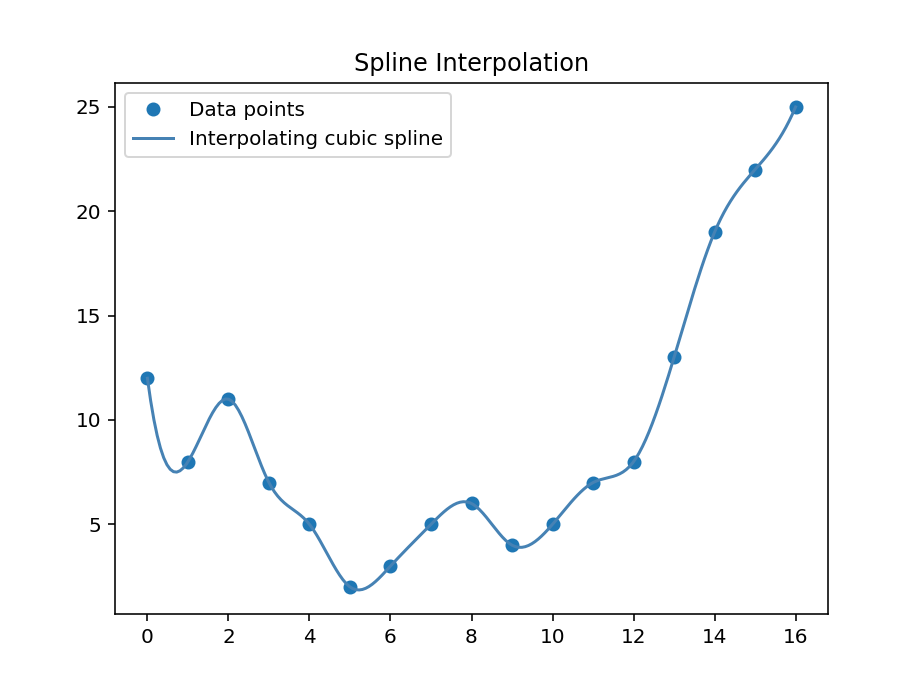

In [3]:
from scipy.interpolate import make_interp_spline
# Create a cubic spline interpolant
spline = make_interp_spline(x, y, k=3)

# Evaluate spline on a fine grid
x_spl = np.linspace(x.min(), x.max(), 200)
y_spl = spline(x_spl)

# Plot
plt.figure()
plt.plot(x, y, 'o', label='Data points')
plt.plot(x_spl, y_spl, label='Interpolating cubic spline', color="steelblue")
plt.legend()
plt.title("Spline Interpolation")
plt.show()

This constructs a spline $S(x)$ such that:

$$S(x_i) = y_i \quad \text{for all } i$$

and ensures continuity of first and second derivatives ($C^2$ continuity for cubic splines).

### Smoothing Splines

When data contains noise, it is often preferable to use a smoothing spline, which balances fidelity to the data with smoothness. SciPy provides  [UnivariateSpline](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.UnivariateSpline.html) class, which requires a smoothing factor s as an input:

<IPython.core.display.Javascript object>


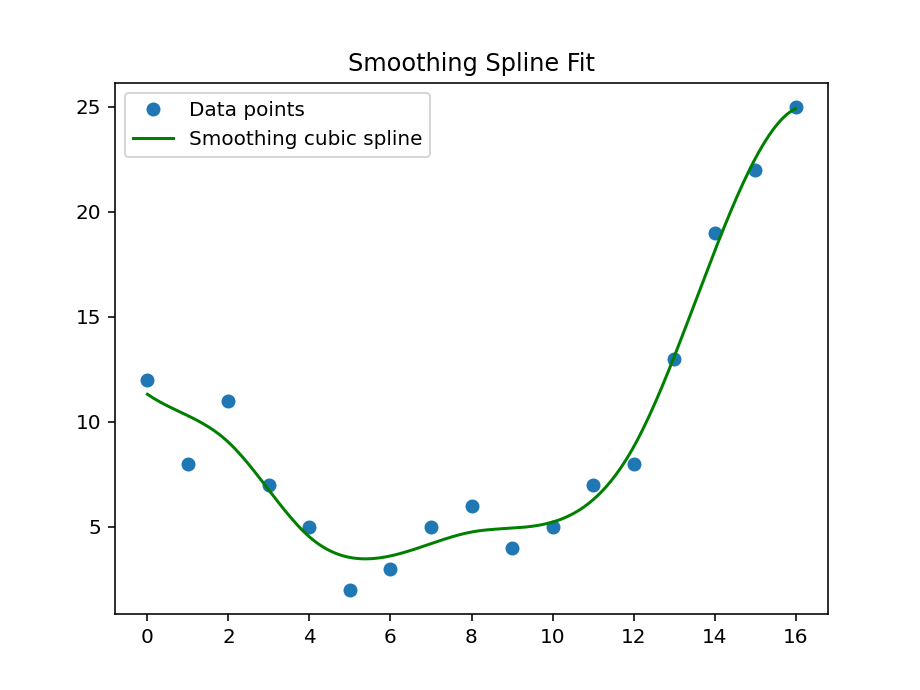

In [4]:
from scipy.interpolate import UnivariateSpline

# Fit smoothing spline with smoothing factor s
spline = UnivariateSpline(x, y, s=18)

x_spl = np.linspace(x.min(), x.max(), 200)
y_spl = spline(x_spl)

plt.figure()
plt.plot(x, y, 'o', label='Data points')
plt.plot(x_spl, y_spl, label='Smoothing cubic spline', color="green")
plt.legend()
plt.title("Smoothing Spline Fit")
plt.show()

The smoothing spline minimizes the penalized least-squares objective:
$$
\min_S \left\{ \sum_{i=1}^n \left( y_i - S(x_i) \right)^2 + \lambda \int_a^b \left( S''(x) \right)^2 dx \right\}
$$
where $\lambda$ is a regularization parameter related to s.

### Least-Squares Splines with User-Defined Knots

[LSQUnivariateSpline](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.LSQUnivariateSpline.html#scipy.interpolate.LSQUnivariateSpline) class offers a more general approach to spline fitting, allowing the user to explicitly specify the placement of interior knots. This gives greater control over the fit structure but requires prior knowledge or assumptions about the appropriate knot locations.

<IPython.core.display.Javascript object>


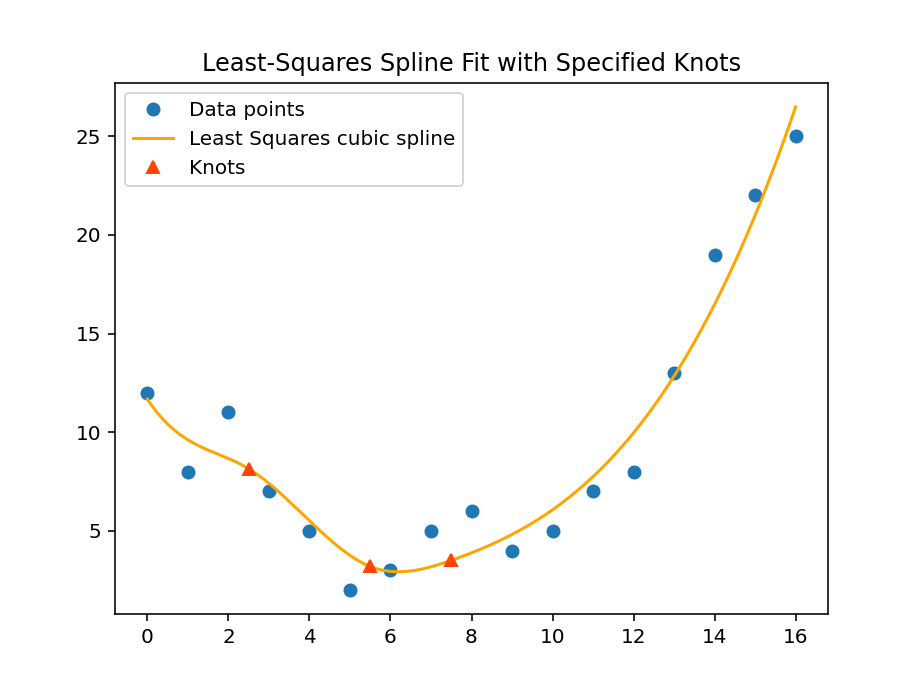

In [5]:
from scipy.interpolate import LSQUnivariateSpline

# Define interior knots (must lie within the x range)
knots = [2.5, 5.5, 7.5]

# Fit least-squares spline of degree 3 (default)
spline = LSQUnivariateSpline(x, y, t=knots)

x_spl = np.linspace(x.min(), x.max(), 200)
y_spl = spline(x_spl)

plt.figure()
plt.plot(x, y, 'o', label='Data points')
plt.plot(x_spl, y_spl, label='Least Squares cubic spline', color="orange")
plt.plot(knots, spline(knots), '^', ms=6, color='orangered', label='Knots')
plt.legend()
plt.title("Least-Squares Spline Fit with Specified Knots")
plt.show()


The spline is constructed to minimize the sum of squared residuals:

$$
\min_S \sum_{i=1}^n \left( y_i - S(x_i) \right)^2
$$

This method is useful when knot positions reflect known features or transitions in the data. It can also be used in a pair with custom algorithms that select the best knot position solving optimization problem to minimize the sum of residuals or another objective function that reflects a measure of the fit quality.